In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [202]:
df = pd.read_excel("ANZ synthesised transaction dataset.xlsx")

In [203]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [205]:
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


The median measures should be used due to the presence of outliers. 

Median balance - 6432

Median amount - 29

In [188]:
df = df.drop(["bpay_biller_code", "currency", "first_name", "transaction_id", "country", "customer_id"], axis=1)

df.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,merchant_code,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,merchant_long_lat,movement
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,153.38 -27.99,debit
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,151.21 -33.87,debit
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,151.21 -33.87,debit
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,153.05 -26.68,debit
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,153.44 -28.06,debit


Columns which are of no use are deleted.

In [207]:
df.extraction = pd.to_datetime(df.extraction)

In [208]:
df_aug = df[(df['date'] >= '2018-08-01') & (df['date'] < '2018-09-01')]

df_aug.describe()

,card_present_flag,merchant_code,balance,age,amount
count,2535.000000,298.0,3943.000000,3943.000000,3943.000000
mean,0.805128,0.0,10794.148620,30.482881,185.121867
std,0.396180,0.0,27731.869137,10.306768,579.376003
min,0.000000,0.0,0.240000,18.000000,1.520000
25%,1.000000,0.0,1646.385000,22.000000,15.455000
50%,1.000000,0.0,3156.410000,27.000000,28.130000
75%,1.000000,0.0,6885.725000,38.000000,51.425000
max,1.000000,0.0,262153.860000,78.000000,8835.980000


For the month of August, median balance = 3156 and median amount = 28

In [209]:
df_sept= df[(df['date'] >= '2018-09-01') & (df['date'] < '2018-10-01')]

df_sept.describe()

,card_present_flag,merchant_code,balance,age,amount
count,2601.000000,272.0,4013.000000,4013.000000,4013.000000
mean,0.799308,0.0,14730.151136,30.533516,182.045903
std,0.400595,0.0,31502.648905,9.930852,574.694422
min,0.000000,0.0,0.980000,18.000000,0.100000
25%,1.000000,0.0,3884.040000,22.000000,16.090000
50%,1.000000,0.0,6502.780000,28.000000,29.000000
75%,1.000000,0.0,11686.430000,38.000000,54.400000
max,1.000000,0.0,264519.110000,78.000000,8835.980000


For the month of September, median balance = 6503 and median amount = 29


In [210]:
df_oct = df[(df['date'] >= '2018-10-01') & (df['date'] < '2018-11-01')]

df_oct.describe()

,card_present_flag,merchant_code,balance,age,amount
count,2581.000000,313.0,4087.000000,4087.000000,4087.000000
mean,0.803565,0.0,18450.991566,30.726205,196.427323
std,0.397379,0.0,34348.138841,9.904421,621.857821
min,0.000000,0.0,559.100000,18.000000,0.100000
25%,1.000000,0.0,5720.805000,24.000000,16.390000
50%,1.000000,0.0,9297.360000,28.000000,29.000000
75%,1.000000,0.0,17165.025000,38.000000,55.000000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


For the month of August, median balance = 9297 and median amount = 29


In [214]:
print(df_aug.amount.groupby(df_aug["txn_description"]).count())
print(df_sept.amount.groupby(df_sept["txn_description"]).count())
print(df_oct.amount.groupby(df_oct["txn_description"]).count())

txn_description
INTER BANK     240
PAY/SALARY     298
PAYMENT        837
PHONE BANK      33
POS           1226
SALES-POS     1309
Name: amount, dtype: int64
txn_description
INTER BANK     240
PAY/SALARY     272
PAYMENT        867
PHONE BANK      33
POS           1294
SALES-POS     1307
Name: amount, dtype: int64
txn_description
INTER BANK     262
PAY/SALARY     313
PAYMENT        896
PHONE BANK      35
POS           1263
SALES-POS     1318
Name: amount, dtype: int64


In [222]:
df_aug.account.value_counts().describe()

count    100.000000
mean      39.430000
std       24.639729
min        3.000000
25%       24.750000
50%       33.000000
75%       48.250000
max      187.000000
Name: account, dtype: float64

Text(0, 0.5, 'Freq')

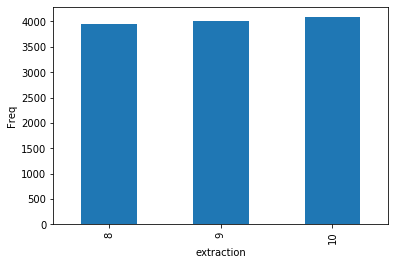

In [223]:
df.amount.groupby(df["extraction"].dt.month).count().plot(kind="bar")
plt.ylabel("Freq")

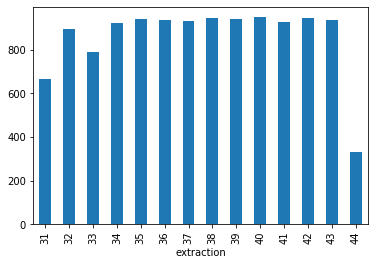

In [194]:
df.amount.groupby(df["extraction"].dt.week).count().plot(kind="bar")

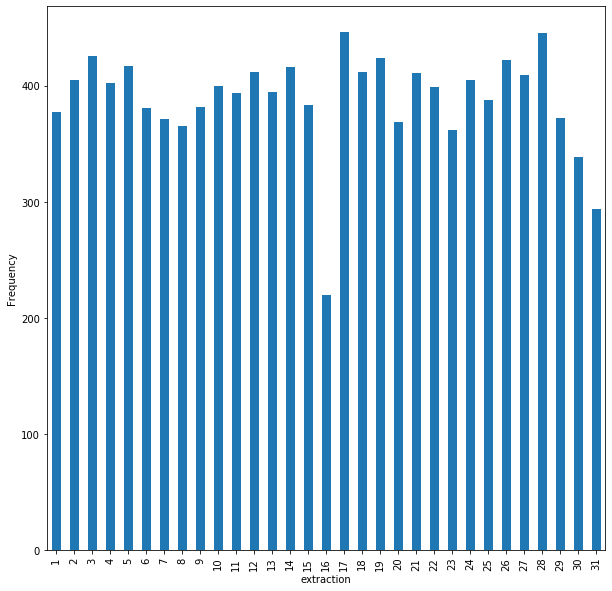

In [300]:
plt.figure(figsize=(10, 10))
df.amount.groupby(df["extraction"].dt.day).count().plot(kind="bar")
plt.ylabel("Frequency")
plt.show()

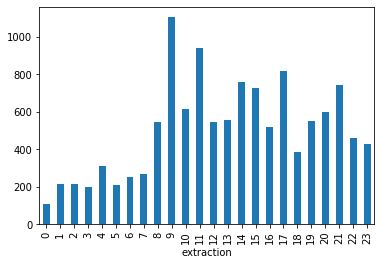

In [225]:
df.amount.groupby(df["extraction"].dt.hour).count().plot(kind="bar")

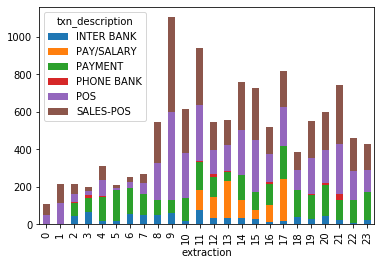

In [236]:
df.groupby([df["extraction"].dt.hour, df.txn_description]).size().unstack().plot(kind='bar', stacked=True)

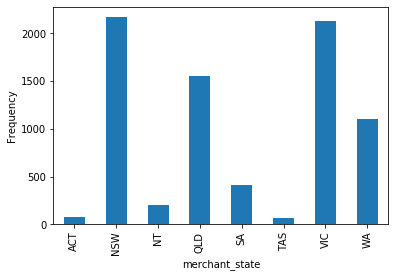

In [301]:
df.amount.groupby(df['merchant_state']).count().plot(kind="bar")
plt.ylabel("Frequency")
plt.show()

In [302]:
df.amount.groupby(df['txn_description']).count()

txn_description
INTER BANK     742
PAY/SALARY     883
PAYMENT       2600
PHONE BANK     101
POS           3783
SALES-POS     3934
Name: amount, dtype: int64

(0, 100)

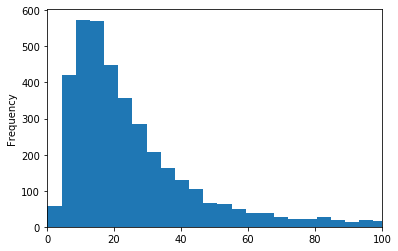

In [312]:
df[df["txn_description"]=='SALES-POS'].amount.plot.hist(bins=1000)
plt.xlim(0, 100)


(0, 100)

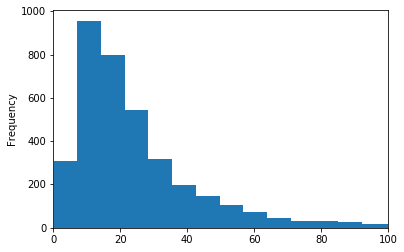

In [311]:
df[df["txn_description"]=='POS'].amount.plot.hist(bins=1000)
plt.xlim(0, 100)